# Support Center Queue

Jill manages a software support center.  Jill wants to run an analysis on how long support requests remain in the system before getting resolved.  Collecting some stats and showing a Histogram of request time in system seems like a nice outcome.  Jill has data of when each request enters the system, and when each request is resolved.  

One methodology is to gather various Scenarios for which to analyze.  For example, a Busy Post Launch Scenario, a Mild Scenario,  A Monday Morning Scenario, etc.   And then use these scenarios to plan staffing, etc.

To test her methodology and code, she will use the following small dataset and make the following assumptions:

- Jobs arrive, are processed, and complete only at integral units of minutes
- Request arrival times:  `0, 5, 10, 12, 14, 15, 55`
- Service times for each request, that is, time to resolve once started: `4, 4, 10, 10, 10, 10, 1`
- There is a single support staff that processes requests First-In-First-Out (FIFO)

## Let's load up some common code modules before we begin

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

## Let's load our data into Python data structures

In [44]:
# arrival_times is a Python list
arrival_times = [0, 5, 10, 12, 14, 15, 55]
pprint(arrival_times)

[0, 5, 10, 12, 14, 15, 55]


In [45]:
# service_times is a Python list
service_durations = [4, 4, 10, 10, 10, 10, 1]
pprint(service_durations)

[4, 4, 10, 10, 10, 10, 1]


## Let's make each job its own "data bundle", an object, in particular a Python Dictionary object.  

### Each job dictionary object will hold two pieces of information, `arrival_time` and `service_completion_time`, initially `service_completion_time` is not know, so we will put a null placeholder there, which in Python is called `None`.

### We will first put all of these job dictionary objects into a new list called, `job_list`

### NOTE:   A List of Dictionary objects is a very common structure we will see many times

In [46]:
job_list = []
# loop through all `arrival_times` and for each, create a new job
for arrival_tm in arrival_times:
    # create a job object
    new_job = {'arrival_time': arrival_tm}
    # add the job object to the arrival_jobs list
    job_list.append(new_job)
    
print("job_list,  Which is a List of job Dictionary objects:\n")
pprint(job_list)

# Let's print out the arrival time of the second job, just for fun
print('\nArrival time of second job: ',job_list[1]['arrival_time'])

job_list,  Which is a List of job Dictionary objects:

[{'arrival_time': 0},
 {'arrival_time': 5},
 {'arrival_time': 10},
 {'arrival_time': 12},
 {'arrival_time': 14},
 {'arrival_time': 15},
 {'arrival_time': 55}]

Arrival time of second job:  5


## Let's create a couple of more data structures that will be useful for our simulation

In [47]:
# job_queue is a List to hold jobs that have arrived and are waiting for service
jobs_in_queue = []
# A variable that holds None or job in service
job_in_service = None
# job_completion_times is a list holding when jobs complete service
completed_jobs = []

In [48]:
def is_simulation_over():
    return len(completed_jobs) == len(arrival_times)
        
def is_unprocessed_job_remaining():
    return len(job_list) > 0

def next_arrival_at_time(time):
    return job_list[0]['arrival_time'] == time

def is_job_in_service():
    return job_in_service != None

def is_job_remaining_in_queue():
    return len(jobs_in_queue) > 0

def is_job_complete(time_period):
    return job_in_service["start_service_time"] + job_in_service["service_duration"] == time_period
    
def set_job_in_service_duration():
    job_in_service["service_duration"] = service_durations.pop(0)
    
def set_job_start_service_time(time_period):
    job_in_service["start_service_time"] =  time_period
    
def set_job_in_service_completion_time(time_period):
    job_in_service["service_completion_time"] = time_period

## We will now loop through time, with a variable called  `time_period`

In [49]:
#  We will increment time_period as simulation proceeds
time_period = 0
#  We will run our simulation until all jobs have departed service
print('Begin simulation loop')
while not is_simulation_over():
    print('Time Period:',time_period)
    #
    # PROCESS POSSIBLE ARRIVAL TO QUEUE
    #
    if (is_unprocessed_job_remaining() and next_arrival_at_time(time_period)):
        print('** Process Arrival at time',time_period)
        
        # remove first job from arrival_jobs
        job_moving_to_queue = job_list.pop(0)
        # append job to end of jobs_in_queue
        jobs_in_queue.append(job_moving_to_queue)
    #
    # PROCESS POSSIBLE SERVICE COMPLETION
    #
    if (is_job_in_service() and is_job_complete(time_period)):
        print('** Process Departure at time',time_period)
        
        # record time of completion
        set_job_in_service_completion_time(time_period)

        # add job to departure_times list
        completed_jobs.append(job_in_service)
        # Free up our server
        job_in_service = None
    #
    # PROCESS POSSIBLE START OF SERVICE, DEPARTURE FROM QUEUE
    if (not is_job_in_service() and is_job_remaining_in_queue()):
        
        print('** Process Start of Service at time:',time_period)
        # remove first job from queue
        job_in_service = jobs_in_queue.pop(0)
        # Place in service by setting service start time and service duration
        set_job_start_service_time(time_period)
        set_job_in_service_duration()
    #
    # Increment the time_period before going back to top of loop
    time_period = time_period + 1

Begin simulation loop
Time Period: 0
** Process Arrival at time 0
** Process Start of Service at time: 0
Time Period: 1
Time Period: 2
Time Period: 3
Time Period: 4
** Process Departure at time 4
Time Period: 5
** Process Arrival at time 5
** Process Start of Service at time: 5
Time Period: 6
Time Period: 7
Time Period: 8
Time Period: 9
** Process Departure at time 9
Time Period: 10
** Process Arrival at time 10
** Process Start of Service at time: 10
Time Period: 11
Time Period: 12
** Process Arrival at time 12
Time Period: 13
Time Period: 14
** Process Arrival at time 14
Time Period: 15
** Process Arrival at time 15
Time Period: 16
Time Period: 17
Time Period: 18
Time Period: 19
Time Period: 20
** Process Departure at time 20
** Process Start of Service at time: 20
Time Period: 21
Time Period: 22
Time Period: 23
Time Period: 24
Time Period: 25
Time Period: 26
Time Period: 27
Time Period: 28
Time Period: 29
Time Period: 30
** Process Departure at time 30
** Process Start of Service at

In [50]:
pprint(completed_jobs[:20],indent=4)

[   {   'arrival_time': 0,
        'service_completion_time': 4,
        'service_duration': 4,
        'start_service_time': 0},
    {   'arrival_time': 5,
        'service_completion_time': 9,
        'service_duration': 4,
        'start_service_time': 5},
    {   'arrival_time': 10,
        'service_completion_time': 20,
        'service_duration': 10,
        'start_service_time': 10},
    {   'arrival_time': 12,
        'service_completion_time': 30,
        'service_duration': 10,
        'start_service_time': 20},
    {   'arrival_time': 14,
        'service_completion_time': 40,
        'service_duration': 10,
        'start_service_time': 30},
    {   'arrival_time': 15,
        'service_completion_time': 50,
        'service_duration': 10,
        'start_service_time': 40},
    {   'arrival_time': 55,
        'service_completion_time': 56,
        'service_duration': 1,
        'start_service_time': 55}]


## Let's gather up the total times in the system and store them in the list, `system_time`

In [51]:
system_time=[]
for job in completed_jobs:
    system_time.append(job['service_completion_time']-job['arrival_time'])
#
pprint(system_time)

[4, 4, 10, 18, 26, 35, 1]


In [52]:
print('The average system time is:',np.mean(system_time))

The average system time is: 14.0


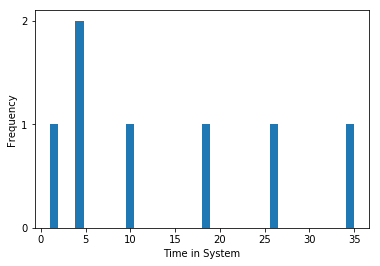

In [53]:
# Tinker with number of bins, until it looks right
plt.hist(system_time,bins=36)
# you can customize the exact tick marks on an axis
plt.yticks(range(0,3))
plt.ylabel('Frequency');
plt.xlabel('Time in System');

## The NumPy package provides lots of statistical methods, we call it with `np`

In [54]:
np.max(system_time)

35

In [55]:
# 50th percentile, or median
np.percentile(system_time,50)

10.0

In [56]:
np.median(system_time)

10.0

In [57]:
np.std(system_time)

11.868325191750639

# Paramount

1. Consider the spreadsheet file, `ParmountArrivals.xls`.  Assume the Cooks act as a single server at rate X.  Anayze the queue for service.

# Support Center: Homework

Add to this notebook to answer the following:

1. Consider the number of jobs in the queue over time, from 0 until all jobs are completed
  - What is the average number of jobs in the queue?
  - Form a histogram of the number of jobs in the queue

1. Consider the time jobs spend in the queue, before beginning service.
  - What is the average time a job spends in the queue?
  - Form a histogram of the time jobs spend in the queue
  

